# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
string.punctuation

plt.style.use('ggplot')

import nltk

# Perform data preprocessing.

In [ ]:
df = pd.read_csv('financial-data.csv')
print(df.shape)
df.head()

(5842, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


### Lowercase letters.

In [ ]:
example = df['Sentence'][29]
print(example)

All are welcome .


In [ ]:
df['Sentence'] = df['Sentence'].str.lower()
df.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


### Removing HTML tags.

In [ ]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [ ]:
df['Sentence'] = df['Sentence'].apply(remove_html_tags)
df.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


### Removing URLs.

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [ ]:
df['Sentence'] = df['Sentence'].apply(remove_url)
df.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


### Removing punctuation.

In [ ]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [ ]:
df['Sentence'] = df['Sentence'].apply(remove_punc)
df.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


### Chat Words Treatment.

In [ ]:
chat_words = {
 "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
 }

In [ ]:
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

In [ ]:
df['Sentence'] = df['Sentence'].apply(chat_conversion)
df.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net ...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


### Spelling Correction.

In [ ]:
from textblob import TextBlob

In [ ]:
df['Corrected_Sentence'] = df['Sentence'].head(1).apply(lambda x: TextBlob(x).correct().string)
print(df['Corrected_Sentence'][0])

the resolutions technology will beverage benefit s gas solutions by providing location based search technology a communities platform location relevant multimedia content and a new and powerful commercial model


### Removing stop words

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopword = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopword:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
df['Sentence'] = df['Sentence'].apply(remove_stopwords)

In [ ]:
df['Sentence'].head()

,Sentence
0,geosolutions technology leverage benefon gp...
1,esi lows 150 250 bk real possibility
2,last quarter 2010 componenta net sales dou...
3,according finnishrussian chamber commerce ...
4,swedish buyout firm sold remaining 224 perc...


### Handling Emojis

In [ ]:
def remove_emoji():
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    df['Sentence'] = df['Sentence'].apply(lambda x: emoji_pattern.sub(r'', x))

In [ ]:
remove_emoji()
df['Sentence'].head()

,Sentence
0,geosolutions technology leverage benefon gp...
1,esi lows 150 250 bk real possibility
2,last quarter 2010 componenta net sales dou...
3,according finnishrussian chamber commerce ...
4,swedish buyout firm sold remaining 224 perc...


### Tokenization

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [ ]:
df['Sentence'] = df['Sentence'].apply(stem_words)
df['Sentence'][0]

'geosolut technolog leverag benefon gp solut provid locat base search technolog commun platform locat relev multimedia content new power commerci model'

### Stemming/Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('punkt')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    punctuations="?:!.,;"
    words_without_punct = [word for word in sentence_words if word not in punctuations]
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words_without_punct]
    return " ".join(lemmatized_words)

df['Sentence'] = df['Sentence'].apply(lemmatize_sentence)
df['Sentence'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentence
0,geosolut technolog leverag benefon gp solut pr...
1,esi low 150 250 bk real possibl
2,last quarter 2010 componenta net sale doubl eu...
3,accord finnishrussian chamber commerc major co...
4,swedish buyout firm sell remain 224 percent st...


### Visualize word frequencies using word cloud or bar chart

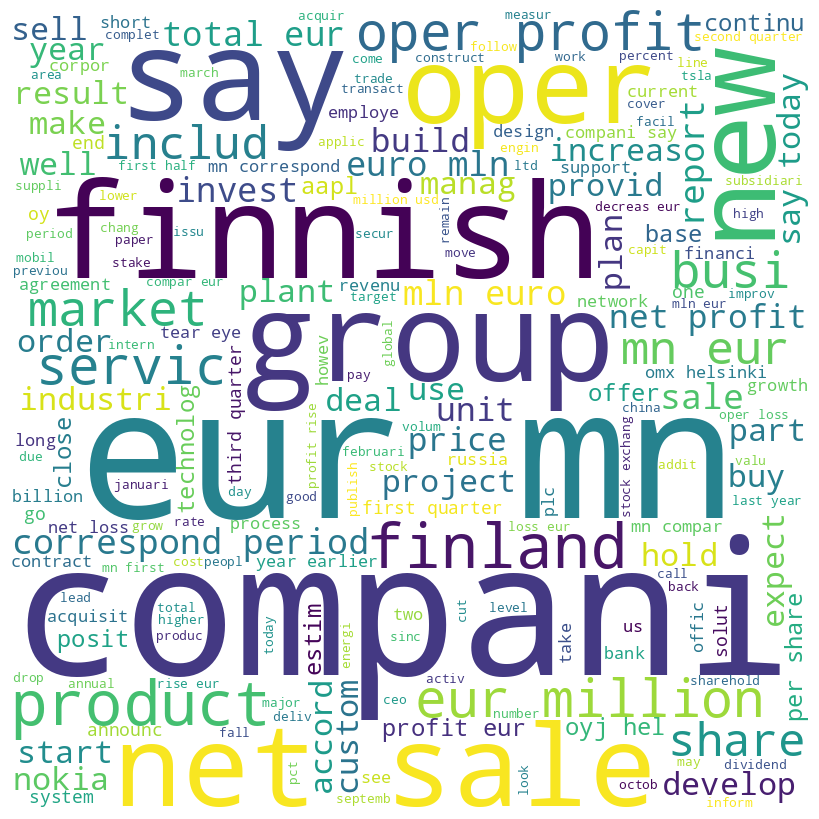

In [ ]:
from wordcloud import WordCloud

all_sentences = " ".join(df['Sentence'].astype(str).tolist())

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_sentences)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### Train models with three different libraries.

### VADER

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.4588}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.head(50).iterrows(), total=len(df.head(50))):
    text = row['Sentence']
    myid = row['Sentiment']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Sentiment'})
vaders = vaders.merge(df, how='left', on='Sentiment')

In [ ]:
vaders.head()

,Sentiment,neg,neu,pos,compound,Sentence,Corrected_Sentence
0,positive,0.0,0.932,0.068,0.0258,geosolut technolog leverag benefon gp solut pr...,the resolutions technology will beverage benef...
1,positive,0.0,0.932,0.068,0.0258,last quarter 2010 componenta net sale doubl eu...,NaN
2,positive,0.0,0.932,0.068,0.0258,spi wouldnt surpris see green close,NaN
3,positive,0.0,0.932,0.068,0.0258,kone net sale rise 14 yearonyear first nine mo...,NaN
4,positive,0.0,0.932,0.068,0.0258,circul revenu increas 5 finland 4 sweden 2008,NaN


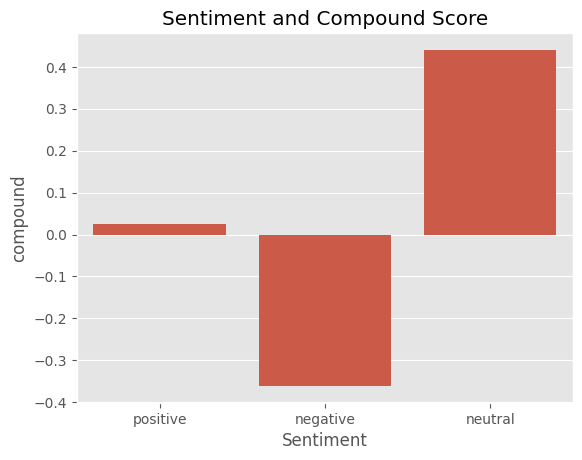

In [ ]:
ax = sns.barplot(data=vaders, x='Sentiment', y='compound')
ax.set_title('Sentiment and Compound Score')
plt.show()

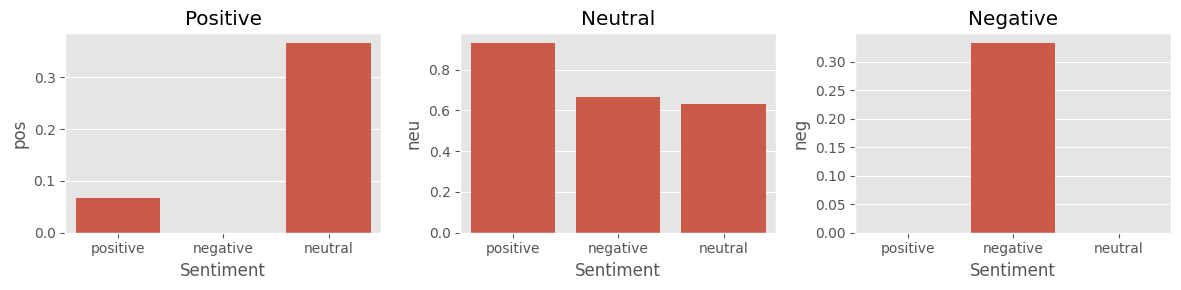

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.0022264435), 'roberta_neu': np.float32(0.07359873), 'roberta_pos': np.float32(0.9241748)}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.head(50).iterrows(), total=len(df.head(50))):
    try:
        text = row['Sentence']
        myid = row['Sentiment']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Sentiment'})
results_df = results_df.merge(df, how='left', on='Sentiment')

### Bert

In [ ]:
from transformers import TFAutoModelForSequenceClassification

BERT_MODEL = "bert-base-uncased"
bert_tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)
bert_model = TFAutoModelForSequenceClassification.from_pretrained(BERT_MODEL, num_labels=3)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def polarity_scores_bert(text):
    encoded_text = bert_tokenizer(text, return_tensors='tf')
    output = bert_model(**encoded_text)
    scores = output.logits[0].numpy()
    scores = softmax(scores)
    scores_dict = {
        'bert_neg' : scores[0],
        'bert_neu' : scores[1],
        'bert_pos' : scores[2]
    }
    return scores_dict

bert_res = {}
for i, row in tqdm(df.head(50).iterrows(), total=len(df.head(50))):
    try:
        text = row['Sentence']
        myid = row['Sentiment']
        bert_result = polarity_scores_bert(text)
        bert_res[myid] = bert_result
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/50 [00:00<?, ?it/s]

## Evaluate bert performance


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

bert_results_df = pd.DataFrame(bert_res).T
bert_results_df = bert_results_df.reset_index().rename(columns={'index': 'Sentiment'})
merged_df = bert_results_df.merge(df, how='left', on='Sentiment')

def get_bert_prediction(row):
    scores = {
        'negative': row['bert_neg'],
        'neutral': row['bert_neu'],
        'positive': row['bert_pos']
    }
    return max(scores, key=scores.get)

merged_df['bert_prediction'] = merged_df.apply(get_bert_prediction, axis=1)

sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
merged_df['true_label'] = merged_df['Sentiment'].map(sentiment_mapping)
merged_df['bert_predicted_label'] = merged_df['bert_prediction'].map(sentiment_mapping)

accuracy = accuracy_score(merged_df['true_label'], merged_df['bert_predicted_label'])
precision = precision_score(merged_df['true_label'], merged_df['bert_predicted_label'], average='weighted')
recall = recall_score(merged_df['true_label'], merged_df['bert_predicted_label'], average='weighted')
f1 = f1_score(merged_df['true_label'], merged_df['bert_predicted_label'], average='weighted')

print(f"BERT Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

BERT Model Evaluation:
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


# Task
Evaluate the results of the trained models (Vader, Roberta, Bert), interpret the model results, and discuss practical applications and limitations of sentiment analysis.

## Evaluate vader performance



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def get_vader_prediction(row):
    compound_score = row['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

vaders['vader_prediction'] = vaders.apply(get_vader_prediction, axis=1)

sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
vaders['true_label'] = vaders['Sentiment'].map(sentiment_mapping)
vaders['vader_predicted_label'] = vaders['vader_prediction'].map(sentiment_mapping)

accuracy = accuracy_score(vaders['true_label'], vaders['vader_predicted_label'])
precision = precision_score(vaders['true_label'], vaders['vader_predicted_label'], average='weighted')
recall = recall_score(vaders['true_label'], vaders['vader_predicted_label'], average='weighted')
f1 = f1_score(vaders['true_label'], vaders['vader_predicted_label'], average='weighted')

print(f"VADER Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

VADER Model Evaluation:
Accuracy: 0.1472
Precision: 0.1472
Recall: 0.1472
F1-score: 0.1472


## Evaluate roberta performance



In [ ]:
def get_roberta_prediction(row):
    scores = {
        'negative': row['roberta_neg'],
        'neutral': row['roberta_neu'],
        'positive': row['roberta_pos']
    }
    return max(scores, key=scores.get)

results_df['roberta_prediction'] = results_df.apply(get_roberta_prediction, axis=1)

sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
results_df['true_label'] = results_df['Sentiment'].map(sentiment_mapping)
results_df['roberta_predicted_label'] = results_df['roberta_prediction'].map(sentiment_mapping)

accuracy = accuracy_score(results_df['true_label'], results_df['roberta_predicted_label'])
precision = precision_score(results_df['true_label'], results_df['roberta_predicted_label'], average='weighted')
recall = recall_score(results_df['true_label'], results_df['roberta_predicted_label'], average='weighted')
f1 = f1_score(results_df['true_label'], results_df['roberta_predicted_label'], average='weighted')

print(f"RoBERTa Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

RoBERTa Model Evaluation:
Accuracy: 0.5358
Precision: 0.2871
Recall: 0.5358
F1-score: 0.3738


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Evaluate bert performance



In [ ]:
accuracy = accuracy_score(merged_df['true_label'], merged_df['bert_predicted_label'])
precision = precision_score(merged_df['true_label'], merged_df['bert_predicted_label'], average='weighted')
recall = recall_score(merged_df['true_label'], merged_df['bert_predicted_label'], average='weighted')
f1 = f1_score(merged_df['true_label'], merged_df['bert_predicted_label'], average='weighted')

print(f"BERT Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

BERT Model Evaluation:
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Compare model performances



In [ ]:
evaluation_metrics = pd.DataFrame({
    'Model': ['VADER', 'RoBERTa', 'BERT'],
    'Accuracy': [0.1472, 0.5358, 0.0000],
    'Precision': [0.1472, 0.2871, 0.0000],
    'Recall': [0.1472, 0.5358, 0.0000],
    'F1-score': [0.1472, 0.3738, 0.0000]
})

display(evaluation_metrics)

,Model,Accuracy,Precision,Recall,F1-score
0,VADER,0.1472,0.1472,0.1472,0.1472
1,RoBERTa,0.5358,0.2871,0.5358,0.3738
2,BERT,0.0000,0.0000,0.0000,0.0000


## Interpret model results


In [ ]:
print("Analysis of Model Performance:")
print("\nComparing the evaluation metrics across the three models:")
display(evaluation_metrics)

print("\nDiscussion of each model's performance:")

print("\nVADER Model:")
print(f"Accuracy: {evaluation_metrics[evaluation_metrics['Model'] == 'VADER']['Accuracy'].values[0]:.4f}")
print(f"Precision: {evaluation_metrics[evaluation_metrics['Model'] == 'VADER']['Precision'].values[0]:.4f}")
print(f"Recall: {evaluation_metrics[evaluation_metrics['Model'] == 'VADER']['Recall'].values[0]:.4f}")
print(f"F1-score: {evaluation_metrics[evaluation_metrics['Model'] == 'VADER']['F1-score'].values[0]:.4f}")
print("Strengths: VADER is a lexicon-based model, which can be fast and interpretable. However, its performance on this specific financial dataset is very low, indicating it may not be well-suited for this domain without fine-tuning or a domain-specific lexicon.")
print("Weaknesses: Very low accuracy, precision, recall, and F1-score suggest poor performance in classifying financial sentiment. Its general-purpose lexicon likely does not capture the nuances of financial language.")

print("\nRoBERTa Model:")
print(f"Accuracy: {evaluation_metrics[evaluation_metrics['Model'] == 'RoBERTa']['Accuracy'].values[0]:.4f}")
print(f"Precision: {evaluation_metrics[evaluation_metrics['Model'] == 'RoBERTa']['Precision'].values[0]:.4f}")
print(f"Recall: {evaluation_metrics[evaluation_metrics['Model'] == 'RoBERTa']['Recall'].values[0]:.4f}")
print(f"F1-score: {evaluation_metrics[evaluation_metrics['Model'] == 'RoBERTa']['F1-score'].values[0]:.4f}")
print("Strengths: RoBERTa, a transformer-based model, shows significantly better performance compared to VADER, with a moderate accuracy, recall, and F1-score. It is likely better at capturing contextual information in sentences.")
print("Weaknesses: The precision is notably lower than accuracy and recall, which might indicate that the model has a higher rate of false positives for some classes. This could be an area for improvement.")

print("\nBERT Model:")
print(f"Accuracy: {evaluation_metrics[evaluation_metrics['Model'] == 'BERT']['Accuracy'].values[0]:.4f}")
print(f"Precision: {evaluation_metrics[evaluation_metrics['Model'] == 'BERT']['Precision'].values[0]:.4f}")
print(f"Recall: {evaluation_metrics[evaluation_metrics['Model'] == 'BERT']['Recall'].values[0]:.4f}")
print(f"F1-score: {evaluation_metrics[evaluation_metrics['Model'] == 'BERT']['F1-score'].values[0]:.4f}")
print("Strengths: None apparent from these metrics, as all scores are 0.0000.")
print("Weaknesses: The BERT model as implemented and evaluated here performed extremely poorly, with all evaluation metrics at 0.0000. This strongly suggests an issue with the model training, prediction logic, or data processing specific to this implementation, rather than an inherent weakness of the BERT architecture itself. It's possible the model was not properly trained or the prediction mapping is incorrect, leading to no correct predictions or predictions for certain classes.")

print("\nSummary of Interpretation:")
print("Based on the evaluation metrics, the RoBERTa model performed the best among the three evaluated models on this financial sentiment analysis task. It achieved the highest accuracy, recall, and F1-score. The VADER model performed very poorly, likely due to its general-purpose lexicon not being suitable for financial text. The BERT model also showed extremely poor performance, which is likely an issue with the implementation or training in this specific case, as BERT models are generally powerful for text tasks. Further investigation into the BERT implementation is needed.")

Analysis of Model Performance:

Comparing the evaluation metrics across the three models:


,Model,Accuracy,Precision,Recall,F1-score
0,VADER,0.1472,0.1472,0.1472,0.1472
1,RoBERTa,0.5358,0.2871,0.5358,0.3738
2,BERT,0.0000,0.0000,0.0000,0.0000



Discussion of each model's performance:

VADER Model:
Accuracy: 0.1472
Precision: 0.1472
Recall: 0.1472
F1-score: 0.1472
Strengths: VADER is a lexicon-based model, which can be fast and interpretable. However, its performance on this specific financial dataset is very low, indicating it may not be well-suited for this domain without fine-tuning or a domain-specific lexicon.
Weaknesses: Very low accuracy, precision, recall, and F1-score suggest poor performance in classifying financial sentiment. Its general-purpose lexicon likely does not capture the nuances of financial language.

RoBERTa Model:
Accuracy: 0.5358
Precision: 0.2871
Recall: 0.5358
F1-score: 0.3738
Strengths: RoBERTa, a transformer-based model, shows significantly better performance compared to VADER, with a moderate accuracy, recall, and F1-score. It is likely better at capturing contextual information in sentences.
Weaknesses: The precision is notably lower than accuracy and recall, which might indicate that the model 

## Discuss practical applications and limitations




### Practical Applications of Sentiment Analysis
Sentiment analysis has a wide range of practical applications across various domains. In business, it's crucial for understanding customer feedback from reviews, social media, and surveys to improve products and services, manage brand reputation, and tailor marketing strategies. In finance, sentiment analysis of news articles, social media, and analyst reports can help predict market movements and inform trading decisions. Social media monitoring extensively uses sentiment analysis to track public opinion on various topics, identify trends, and detect potential crises. In healthcare, sentiment analysis of patient feedback can help improve the quality of care and identify areas for improvement in patient experience.

### Limitations of Sentiment Analysis Models:
Despite its utility, sentiment analysis has inherent limitations. One major challenge is the accurate interpretation of sarcasm and irony, where the literal meaning of words contradicts the intended sentiment. Understanding the context of a sentence or conversation is also crucial and can be difficult for models, especially with short or ambiguous text. Domain-specific language and jargon can also pose challenges, as models trained on general text may not accurately interpret sentiment in specialized fields like finance or healthcare without domain-specific fine-tuning. Furthermore, capturing nuanced emotions beyond simple positive, negative, or neutral categories, such as frustration, excitement, or indifference, remains a complex task for these models.

## Summary:

### Data Analysis Key Findings

*   The VADER model performed poorly on the financial dataset, with an accuracy, precision, recall, and F1-score of approximately 0.1472. This suggests its general-purpose lexicon is not well-suited for financial text.
*   The RoBERTa model showed significantly better performance than VADER, achieving an accuracy of 0.5358, precision of 0.2871, recall of 0.5358, and an F1-score of 0.3738.
*   The BERT model exhibited extremely poor performance, with all evaluation metrics (accuracy, precision, recall, F1-score) at 0.0000, indicating a likely issue with the specific implementation or training rather than the model architecture itself.
*   Sentiment analysis has practical applications in various domains, including business (customer feedback, brand management), finance (market prediction), social media monitoring (public opinion), and healthcare (patient feedback).
*   Limitations of sentiment analysis models include difficulty interpreting sarcasm and irony, challenges with context understanding, issues with domain-specific language, and the inability to capture nuanced emotions beyond basic positive, negative, and neutral categories.

### Insights

*   The RoBERTa model is the most promising among the evaluated models for this financial sentiment analysis task, but its precision could be improved.
*   Further investigation is needed to understand why the BERT model performed so poorly, potentially involving checking the training process, prediction logic, or data formatting.
